# 2. The NumPy array object

### 2.1 What are NumPy and NumPy arrays?

**Python objects:**
* high-level number objects: integers, floating point
* containers: lists (costless insertion and append), dictionaries (fast lookup)

**NumPy provides:**
* extension package to Python for multi-dimensional arrays
* closer to hardware (efficiency)
* designed for scientific computation (convenience)
* also known as *array oriented computing*

For example, an array containing:
* values of an experiment/simulation at discrete time steps
* signal recorded by a measurement device, e.g. sound wave
* pixels of an image, grey-level or colour
* 3-D data measured at different X-Y-Z positions, e.g. MRI scan

**Why it is useful:** Memory-efficient container that provides fast numerical operations

In [1]:
import numpy as np

In [2]:
L = range(1000)

In [3]:
%timeit [i**2 for i in L]

1000 loops, best of 3: 391 µs per loop


In [4]:
a = np.arange(1000)

In [5]:
%timeit a**2

The slowest run took 15.12 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.23 µs per loop


### 2.2. Creating arrays

In [6]:
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

In [7]:
a.ndim

1

In [8]:
a.shape

(4,)

In [9]:
len(a)

4

In [10]:
b = np.array([[0, 1, 2], [3, 4, 5]])  # 2 x 3 array
b

array([[0, 1, 2],
       [3, 4, 5]])

In [11]:
b.ndim

2

In [12]:
b.shape

(2, 3)

In [13]:
len(b)  # returns the size of the first dimension

2

### 2.2.1 Functions for creating arrays

In [14]:
a = np.arange(10) # 0 .. n-1
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
b = np.arange(1, 9, 2)  # start, end (exclusive), step
b

array([1, 3, 5, 7])

In [16]:
c = np.linspace(0, 1, 6)  # start, end, num-points
c

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

In [17]:
d = np.linspace(0, 1, 5, endpoint=False)
d

array([ 0. ,  0.2,  0.4,  0.6,  0.8])

In [18]:
a = np.ones((3,3))
a

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [19]:
b = np.zeros((2,2))
b

array([[ 0.,  0.],
       [ 0.,  0.]])

In [20]:
c = np.eye(3)
c

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [21]:
d = np.diag(np.array([1,2,3,4]))
d

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [22]:
np.random.rand(4)  # uniform in [0, 1]

array([ 0.07925353,  0.52147404,  0.55586785,  0.08242498])

In [23]:
np.random.randn(4)  # Gaussian

array([-1.80328045, -1.6412655 ,  1.20386742,  1.00000695])

In [24]:
np.random.seed(1234)  # Setting the random seed

### 2.3 Basic Visualization

From the notebook we can enable interactive plots by:
```
%matplotlib inline
```
The `inline` is important for the notebook, so that plots are displayed in the notebook and not in a new window

In [25]:
%matplotlib inline

`Matplotlib` is a 2D plotting package. We can import its functions as below:

In [26]:
import matplotlib.pyplot as plt

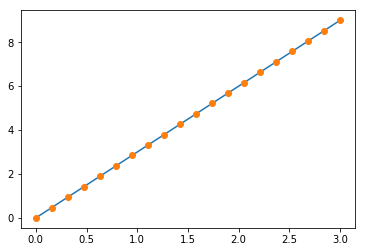

In [27]:
# 1D plotting:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y)
plt.plot(x, y, 'o')  # dot plot

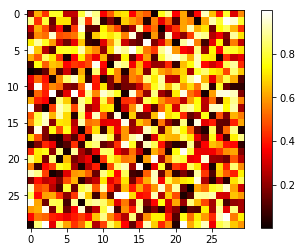

In [28]:
# 2D arrays
image = np.random.rand(30, 30)
plt.imshow(image, cmap=plt.cm.hot)
plt.colorbar()

### 2.4 Indexing and slicing
The items of an array can be accessed and assigned to the same way as other Python sequences (e.g. lists):

In [29]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
a[0], a[2], a[-1]

(0, 2, 9)

For multidimensional arrays, indexes are tuples of integers:
* In 2D, the first dimension corresponds to **rows**, the second to **columns**

In [31]:
a = np.diag(np.arange(3))
a

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 2]])

In [32]:
a[1, 1]

1

In [33]:
a[2, 1] = 10  # third row, second columnt
a

array([[ 0,  0,  0],
       [ 0,  1,  0],
       [ 0, 10,  2]])

In [34]:
a[1]

array([0, 1, 0])

**Slicing: arrays, like other Python sequenes ann also be sliced**

A illustrated summary of NumPy indexing and slicing...

<img src="images/numpy_indexing.png" width="75%" align="center">

### 2.4.1 Copies and views

A slicing operation creates a **view** on the original array, which is justa a way of accessing array data. Thus the original array is not copied in memory. You can use `np.may_share_memory()` to check if two arrays share the same memory block. Note howevery, that this uses heuristics and may give you false positives.

**When modifying the view, the original array is modified as well:**

In [35]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [36]:
b = a[::2]
b

array([0, 2, 4, 6, 8])

In [37]:
np.may_share_memory(a, b)

True

In [38]:
b[0] = 12
b

array([12,  2,  4,  6,  8])

In [39]:
a

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [40]:
a = np.arange(10)
c = a[::2].copy()  # force a copy
c[0] = 12
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [41]:
c

array([12,  2,  4,  6,  8])

In [42]:
np.may_share_memory(a, c)

False

### 2.4.2 Fancy indexing

NumPy arrays can be indexed with slices, but also with boolean or integer arrays (**masks**). This method is called *fancy indexing*. It creates **copies not views**.

In [43]:
np.random.seed(3)
a = np.random.randint(0, 20, 15)
a

array([10,  3,  8,  0, 19, 10, 11,  9, 10,  6,  0, 12,  7, 14, 17])

In [44]:
(a % 3 == 0)

array([False,  True, False,  True, False, False, False,  True, False,
        True,  True,  True, False, False, False], dtype=bool)

In [45]:
mask = (a % 3 == 0)
extract_from_a = a[mask]  # or, a[a%3==0]
extract_from_a            # extract a sub-array with the mask

array([ 3,  0,  9,  6,  0, 12])

In [46]:
a[a % 3 == 0] = -1
a

array([10, -1,  8, -1, 19, 10, 11, -1, 10, -1, -1, -1,  7, 14, 17])

In [47]:
# Indexing with an array of integers
a = np.arange(0, 100, 10)

In [48]:
a[[2,3,2,4,2]]

array([20, 30, 20, 40, 20])